In [1]:
churn_data = read.csv('Churn+Data.csv')

In [2]:
str(churn_data)

'data.frame':	3333 obs. of  11 variables:
 $ Churn          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AccountWeeks   : int  128 107 137 84 75 118 121 147 117 141 ...
 $ ContractRenewal: int  1 1 1 0 0 0 1 0 1 0 ...
 $ DataPlan       : int  1 1 0 0 0 0 1 0 0 1 ...
 $ DataUsage      : num  2.7 3.7 0 0 0 0 2.03 0 0.19 3.02 ...
 $ CustServCalls  : int  1 1 0 2 3 0 3 0 1 0 ...
 $ DayMins        : num  265 162 243 299 167 ...
 $ DayCalls       : int  110 123 114 71 113 98 88 79 97 84 ...
 $ MonthlyCharge  : num  89 82 52 57 41 57 87.3 36 63.9 93.2 ...
 $ OverageFee     : num  9.87 9.78 6.06 3.1 7.42 ...
 $ RoamMins       : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...


In [4]:
churn_data$Churn = factor(churn_data$Churn)

In [5]:
logit_model = glm(Churn ~., data=churn_data, family='binomial')

In [6]:
churn_data$churn_predicted = predict(logit_model, data=churn_data, type='response')

In [7]:
churn_data$churn_predicted = ifelse(churn_data$churn_predicted>0.5,1,0)

In [8]:
table(churn_data$Churn, churn_data$churn_predicted)

   
       0    1
  0 2780   70
  1  394   89

In [9]:
misClassError = mean(churn_data$churn_predicted != churn_data$Churn)

In [11]:
print(paste('Accuracy =',1-misClassError))

[1] "Accuracy = 0.860786078607861"


### Out of sample error

In [12]:
# Split data in train and test dataset
install.packages('caTools')

also installing the dependency 'bitops'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yusuf\AppData\Local\Temp\RtmpmaOQ1k\downloaded_packages


In [13]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [14]:
set.seed(390)
split = sample.split(churn_data, SplitRatio = 0.70)
split

[1] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE

In [15]:
train = subset(churn_data, split== 'TRUE')
test = subset(churn_data, split=='FALSE')

In [16]:
str(train)

'data.frame':	2222 obs. of  12 variables:
 $ Churn          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 1 2 ...
 $ AccountWeeks   : int  107 84 75 118 121 147 65 74 95 161 ...
 $ ContractRenewal: int  1 0 0 0 1 0 1 1 1 1 ...
 $ DataPlan       : int  1 0 0 0 1 0 0 0 0 0 ...
 $ DataUsage      : num  3.7 0 0 0 2.03 0 0.29 0.34 0.44 0 ...
 $ CustServCalls  : int  1 2 3 0 3 0 4 0 3 4 ...
 $ DayMins        : num  162 299 167 223 218 ...
 $ DayCalls       : int  123 71 113 98 88 79 137 127 88 67 ...
 $ MonthlyCharge  : num  82 57 41 57 87.3 36 44.9 49.4 52.4 84 ...
 $ OverageFee     : num  9.78 3.1 7.42 11.03 17.43 ...
 $ RoamMins       : num  13.7 6.6 10.1 6.3 7.5 7.1 12.7 9.1 12.3 5.4 ...
 $ churn_predicted: num  0 1 0 0 0 0 0 0 0 1 ...


In [17]:
str(test)

'data.frame':	1111 obs. of  12 variables:
 $ Churn          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ AccountWeeks   : int  128 137 117 141 168 62 147 77 132 57 ...
 $ ContractRenewal: int  1 1 1 0 1 1 1 1 1 1 ...
 $ DataPlan       : int  1 0 0 1 0 0 0 0 0 1 ...
 $ DataUsage      : num  2.7 0 0.19 3.02 0 0 0.31 0 0 2.57 ...
 $ CustServCalls  : int  1 0 1 0 1 4 0 5 0 0 ...
 $ DayMins        : num  265 243 184 259 129 ...
 $ DayCalls       : int  110 114 97 84 96 70 117 89 86 115 ...
 $ MonthlyCharge  : num  89 52 63.9 93.2 31 47 50.1 26 35 78.7 ...
 $ OverageFee     : num  9.87 6.06 17.58 11.1 5.25 ...
 $ RoamMins       : num  10 12.2 8.7 11.2 11.2 13.1 10.6 5.7 10.3 9.5 ...
 $ churn_predicted: num  0 0 0 0 0 0 0 0 0 0 ...


In [19]:
# Train model with logistic regression using glm function
logit_model = glm(Churn ~., data= train, family='binomial')

In [20]:
logit_model


Call:  glm(formula = Churn ~ ., family = "binomial", data = train)

Coefficients:
    (Intercept)     AccountWeeks  ContractRenewal         DataPlan  
     -5.8415026       -0.0002176       -2.2973574       -1.4657538  
      DataUsage    CustServCalls          DayMins         DayCalls  
      0.8602383        0.6133581        0.0250707        0.0012081  
  MonthlyCharge       OverageFee         RoamMins  churn_predicted  
     -0.0688517        0.2647081        0.0981039       -0.6121556  

Degrees of Freedom: 2221 Total (i.e. Null);  2210 Residual
Null Deviance:	    1864 
Residual Deviance: 1459 	AIC: 1483

In [21]:
summary(logit_model)


Call:
glm(formula = Churn ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8314  -0.5134  -0.3329  -0.1900   3.0635  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -5.8415026  0.6876306  -8.495  < 2e-16 ***
AccountWeeks    -0.0002176  0.0017561  -0.124 0.901398    
ContractRenewal -2.2973574  0.2088407 -11.001  < 2e-16 ***
DataPlan        -1.4657538  0.6573964  -2.230 0.025772 *  
DataUsage        0.8602383  2.3549308   0.365 0.714893    
CustServCalls    0.6133581  0.0520640  11.781  < 2e-16 ***
DayMins          0.0250707  0.0397756   0.630 0.528496    
DayCalls         0.0012081  0.0033379   0.362 0.717402    
MonthlyCharge   -0.0688517  0.2335740  -0.295 0.768166    
OverageFee       0.2647081  0.3986152   0.664 0.506646    
RoamMins         0.0981039  0.0269550   3.640 0.000273 ***
churn_predicted -0.6121556  0.2789198  -2.195 0.028182 *  
---
Signif. codes:  0 '***' 0.001 '**

In [22]:
logit_model_1 = glm(Churn ~ CustServCalls + ContractRenewal+RoamMins, data=train,family=binomial)

In [23]:
summary(logit_model_1)


Call:
glm(formula = Churn ~ CustServCalls + ContractRenewal + RoamMins, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6542  -0.5350  -0.4152  -0.3256   2.6332  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.84829    0.30339  -6.092 1.11e-09 ***
CustServCalls    0.49507    0.04486  11.035  < 2e-16 ***
ContractRenewal -1.95571    0.16711 -11.703  < 2e-16 ***
RoamMins         0.08194    0.02356   3.478 0.000505 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1863.5  on 2221  degrees of freedom
Residual deviance: 1612.2  on 2218  degrees of freedom
AIC: 1620.2

Number of Fisher Scoring iterations: 5


In [24]:
# Making prediction using test dataset based on logit model
fitted.results = predict(logit_model, test, type='response')

In [ ]:
fitted.results.new = fitted.results

In [25]:
# Change probabilities to class
fitted.results = ifelse(fitted.results>0.5, 1,0)

In [26]:
# Evaluate model accuracy using confusion matrix
table(test$Churn, fitted.results)
misClassError = mean(fitted.results != test$Churn)
print(paste('Accuracy = ', 1-misClassError))

   fitted.results
      0   1
  0 920  37
  1 120  34

[1] "Accuracy =  0.858685868586859"


In [29]:
# Model Evaluation using confusion matrix function
library(caret)

In [28]:
library(lattice)
library(ggplot2)

In [30]:
confusionMatrix(table(test$Churn, fitted.results))

Confusion Matrix and Statistics

   fitted.results
      0   1
  0 920  37
  1 120  34
                                          
               Accuracy : 0.8587          
                 95% CI : (0.8368, 0.8786)
    No Information Rate : 0.9361          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2353          
                                          
 Mcnemar's Test P-Value : 5.977e-11       
                                          
            Sensitivity : 0.8846          
            Specificity : 0.4789          
         Pos Pred Value : 0.9613          
         Neg Pred Value : 0.2208          
             Prevalence : 0.9361          
         Detection Rate : 0.8281          
   Detection Prevalence : 0.8614          
      Balanced Accuracy : 0.6817          
                                          
       'Positive' Class : 0               
                                          

In [31]:
# ROC-AUC curve
install.packages('ROCR')

also installing the dependencies 'gtools', 'gplots'



package 'gtools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yusuf\AppData\Local\Temp\RtmpmaOQ1k\downloaded_packages


In [32]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.3"

In [33]:
ROCRpred = prediction(fitted.results, test$Churn)

In [35]:
ROCRPerf = performance(ROCRpred, measure='tpr', x.measure='fpr')

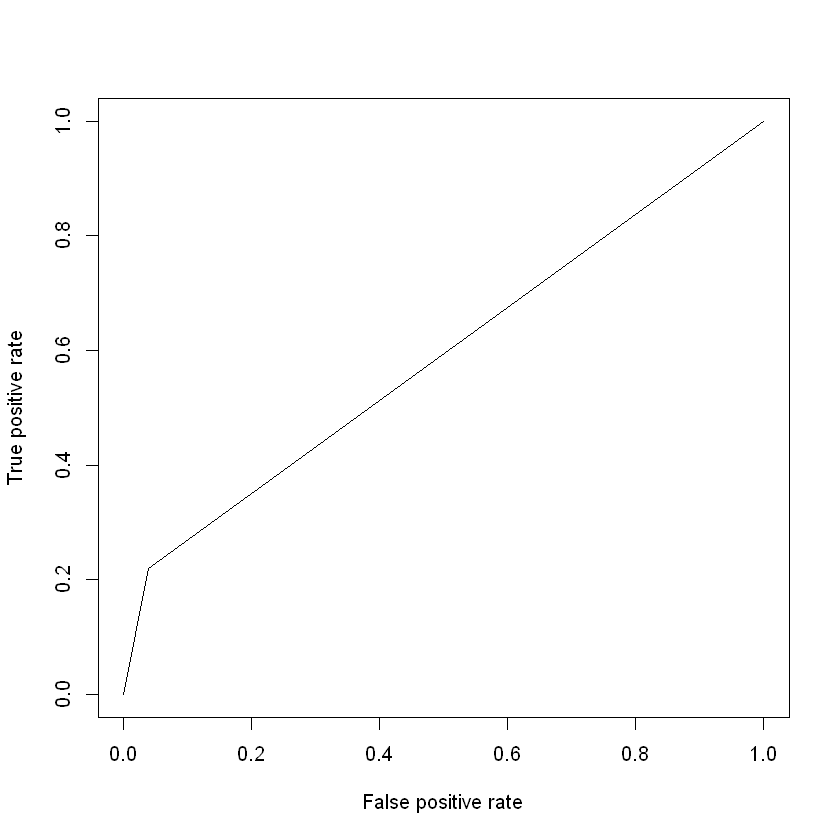

In [36]:
plot(ROCRPerf)

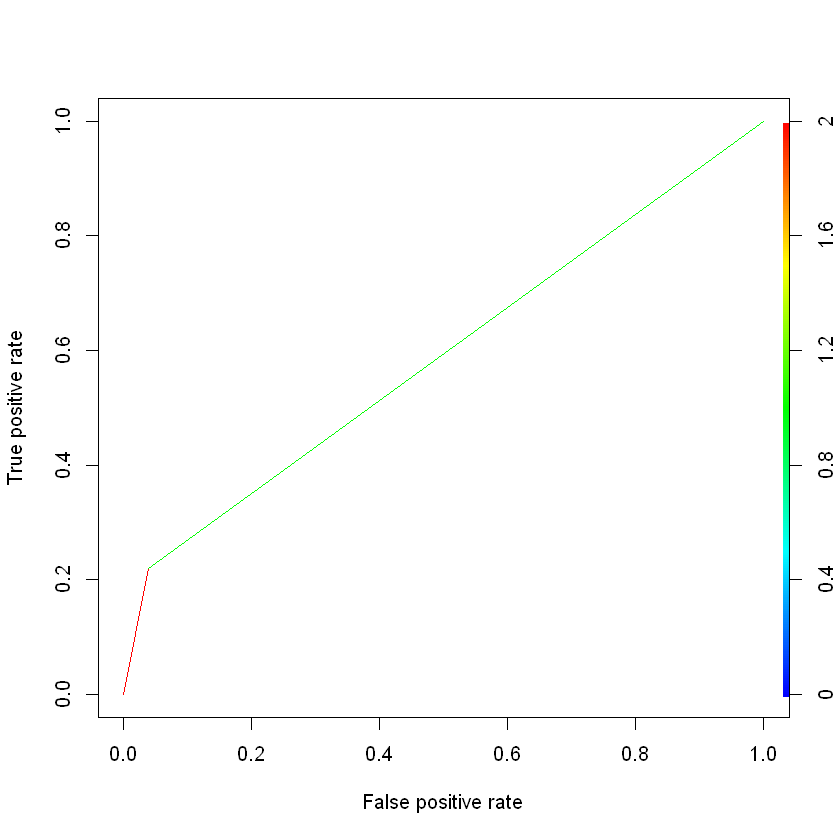

In [37]:
plot(ROCRPerf, colorize=TRUE)

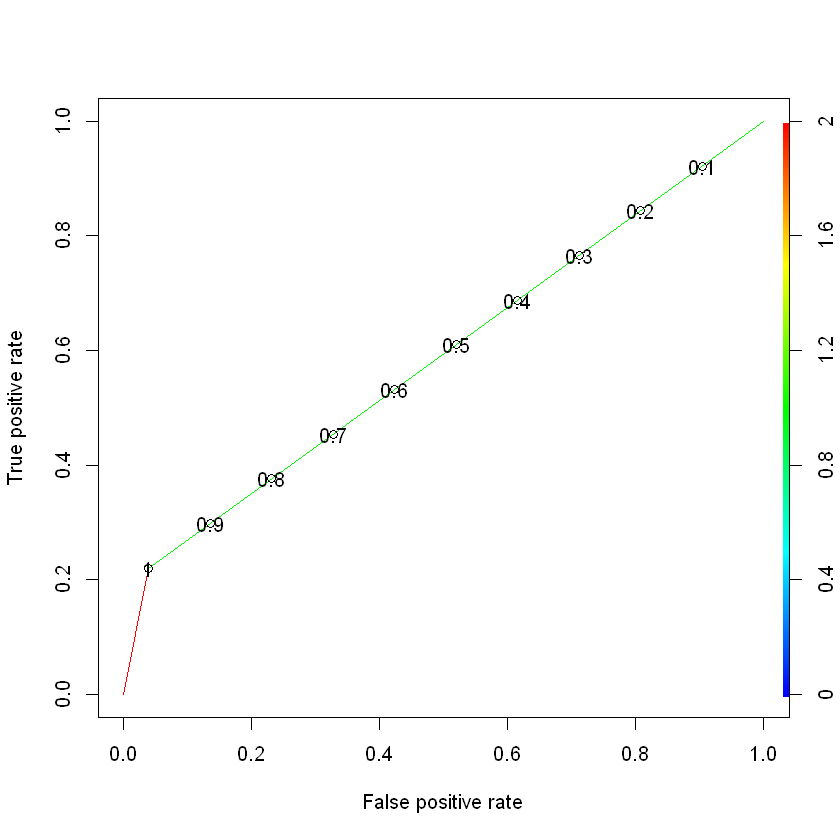

In [38]:
plot(ROCRPerf, colorize=TRUE, print.cutoffs.at=seq(0.1, by=0.1))

[1] 0.5910584

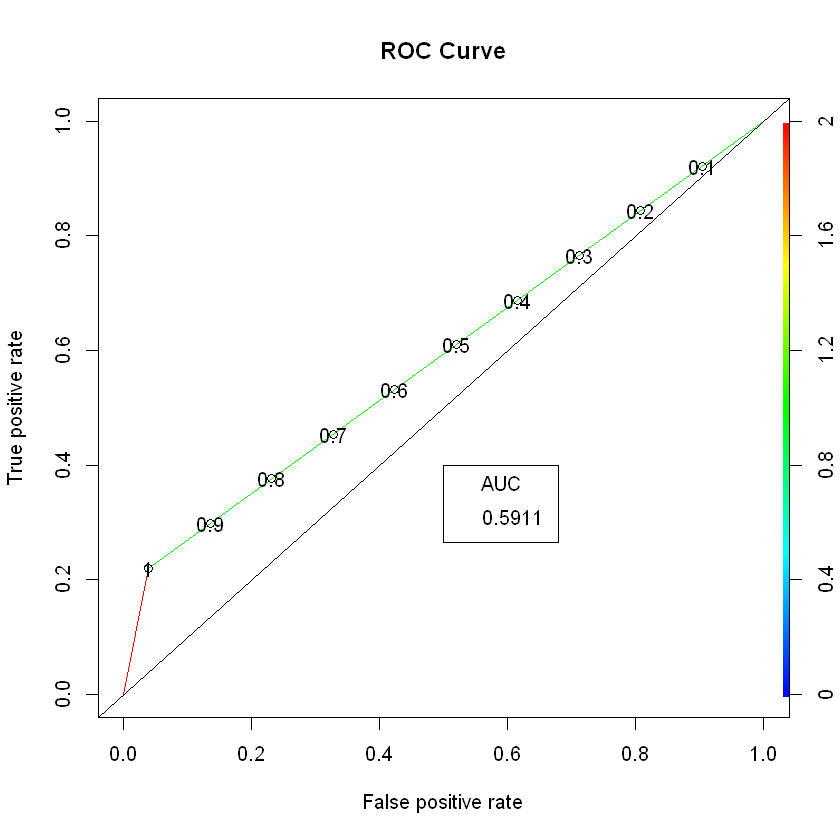

In [48]:
plot(ROCRPerf, colorize=TRUE, print.cutoffs.at=seq(0.1, by=0.1), main = 'ROC Curve')
abline(a=0, b=1)
auc = performance(ROCRpred, measure = 'auc')
auc = auc@y.values[[1]]
auc
auc = round(auc, 4)
legend(0.5, 0.4, auc, title='AUC', cex=1)